## Final Project Submission

Please fill out:
* Student name: Aleigha (Aly) Sardina-Spevack
* Student pace: Self paced 
* Scheduled project review date/time: June 21, 2019 at 6PM EST
* Instructor name: Eli Thomas
* Blog post URL: https://medium.com/@sardina.aleigha/bank-marketing-a-classification-exercise-fd9b77a1da4d


# Retail Bank Marketing Campaign Analysis


We are looking at the data collected from direct marketing campaigns of a Portuguese banking institution. The method of marketing consisted of customer phone calls. Most potential subscribers required multiple touch points to determine if the customer had subscribed to the featured product.

The product for this focused analysis is a term deposit, a cash investment that is held at a financial instituion at an agreed interest rate for a fixed term (amount of time).

We will be building a classification model to correctly analyze the binary customer behavior (yes - subscribed or no - did not subscribe).

The original source data can be found at:  http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#


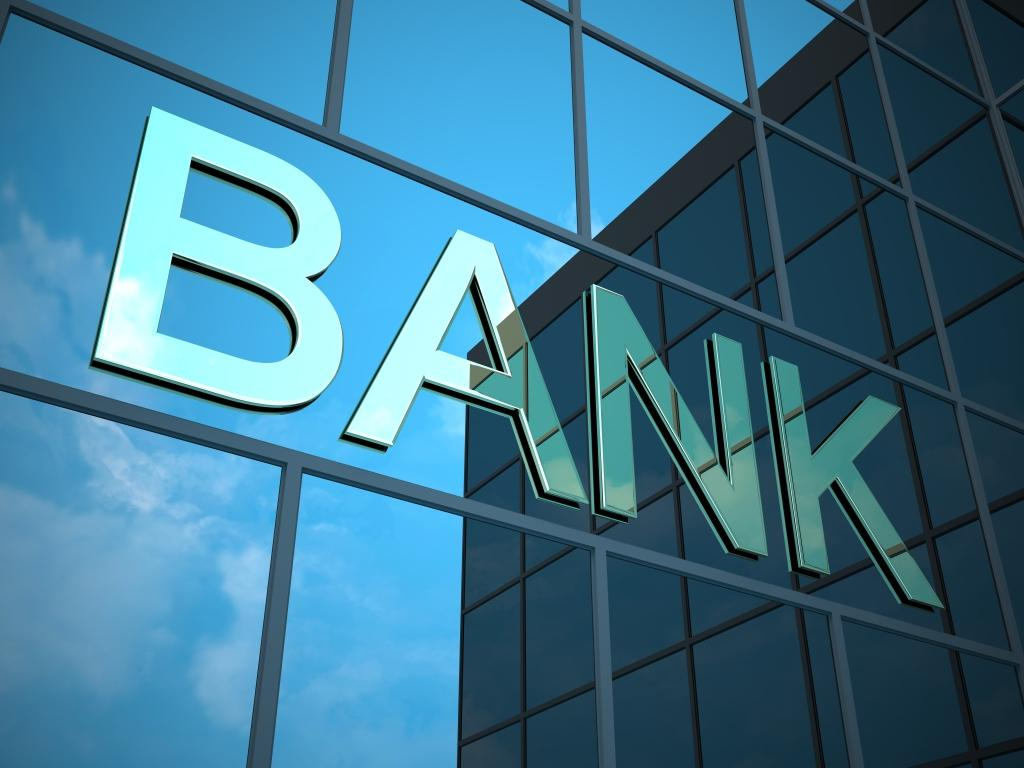

### Below is a list of all the attributes included in the dataset, as well as a description and the expected data type


#### __Attribute Information:__

__Bank client data:__

Age: (numeric)<br>
Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')<br>
Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)<br>
Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')<br>
Default: has credit in default? (categorical: 'no', 'yes', 'unknown')<br>
Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')<br>
Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

__Related with the last contact of the current campaign:__

Contact: contact communication type (categorical: 'cellular','telephone')<br>
Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
Duration: last contact duration, in seconds (numeric). 

__Other attributes:__

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means 
client was not previously contacted)<br>
Previous: number of contacts performed before this campaign and for this client (numeric)<br>
Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>


__Social and economic context attributes:__

Emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
Cons.price.idx: consumer price index - monthly indicator (numeric)<br>
Cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
Euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
Nr.employed: number of employees - quarterly indicator (numeric)<br>

__The output variable is stored as 'y'__

## Exploration and Cleaning

First, we will import our libraries and then we can get started loading and cleaning the data.

In [65]:
#importing libraries under standard aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#inline visualizations
%matplotlib inline

#importing our models and scoring libraries
#we'll be using mostly Scikit.Learn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

#visualtion methods and methods for model analysis
from sklearn.metrics import roc_curve, auc, confusion_matrix

#setting a random seed for reproduceability
import random
random.seed(42)

#setting filter warnings to ignore to keep our notebook clean
import warnings
warnings.filterwarnings("ignore")


In [66]:
#loading the whole data set from the csv file and into pandas
#note that this file is ';' separated, not ',' separated

data = pd.read_csv("bank-additional-full.csv", sep = ';')

#reviwing the dataframe to ensure everything loaded correctly
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Before we begin cleaning, we will get a feel for the data by looking at some summary statistics.

In [67]:
print(data.shape)

data.describe()

(41188, 21)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [68]:
#checking for Null values 
data.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [69]:
#looking at our target column 
print(data.y.unique())


['no' 'yes']


The first step in cleaning will be to convert the target column, y, to field containing numerical data 0 for 'no' and 1 for 'yes'

In [70]:
data['y'] = data['y'].apply(lambda x: 0 if x=='no' else 1)
data.y.unique()

array([0, 1], dtype=int64)

And how many 'yes' customers do we actually have?

In [71]:
print(data['y'])

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       1
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       1
84       0
85       0
86       0
87       0
88       1
89       0
90       0

Name: y, dtype: int64


In [72]:
data.y.sum()

4640

An 11.3% Sucess rate on a phone marketing campaign is very reasonable.  This type of marketing approach is worth repeating if we can identify these customers in advance.  Then it's only a matter of making all the calls.

Next we'll look at the .info() summary statistics to ensure that the expected column type matches so that we can handle null values that are obscured from .isna()

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Everything looks clean now.

Many of the feature columns are categorical and need to be split into dummy variables.  

In [74]:
#renaming to be more descriptive
df = data

#creating a list of categorical columns for easier coding
cols = ['job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

#using the pandas get_dummies method and adding a prefix to denote the columns we changed
df = pd.get_dummies(df, prefix='d_', columns=cols)
df.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,d__oct,d__sep,d__fri,d__mon,d__thu,d__tue,d__wed,d__failure,d__nonexistent,d__success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


Let's have a look at the histograms of the features we selected.    

In [75]:
#Variable/Feature Selection
correlation = df.corr(method='pearson')
correlation_target = pd.DataFrame(correlation['y'], columns = ['y'])
correlation_target['y'] = correlation_target['y'].abs()
correlation_target = correlation_target.sort_values(by=['y'],ascending=False)
pd.set_option('display.max_rows', None)
print(correlation_target.head(20))


                       y
y               1.000000
duration        0.405274
nr.employed     0.354678
pdays           0.324914
d__success      0.316269
euribor3m       0.307771
emp.var.rate    0.298334
previous        0.230181
d__nonexistent  0.193507
d__telephone    0.144773
d__cellular     0.144773
d__mar          0.144014
d__oct          0.137366
cons.price.idx  0.136211
d__sep          0.126067
d__may          0.108271
d__no           0.099344
d__unknown      0.099293
d__student      0.093955
d__retired      0.092221


In [76]:
#Number before dropoff
#Test 6 and 8 and see if there is a significant change. Least number of variables is best for performance and not overfitting
df_limit_top7=df[['duration', 'nr.employed', 'pdays', 'd__success', 'euribor3m', 'emp.var.rate', 'previous']]

In [80]:
print('cat')

cat


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B213D3A288>,
      dtype=object)

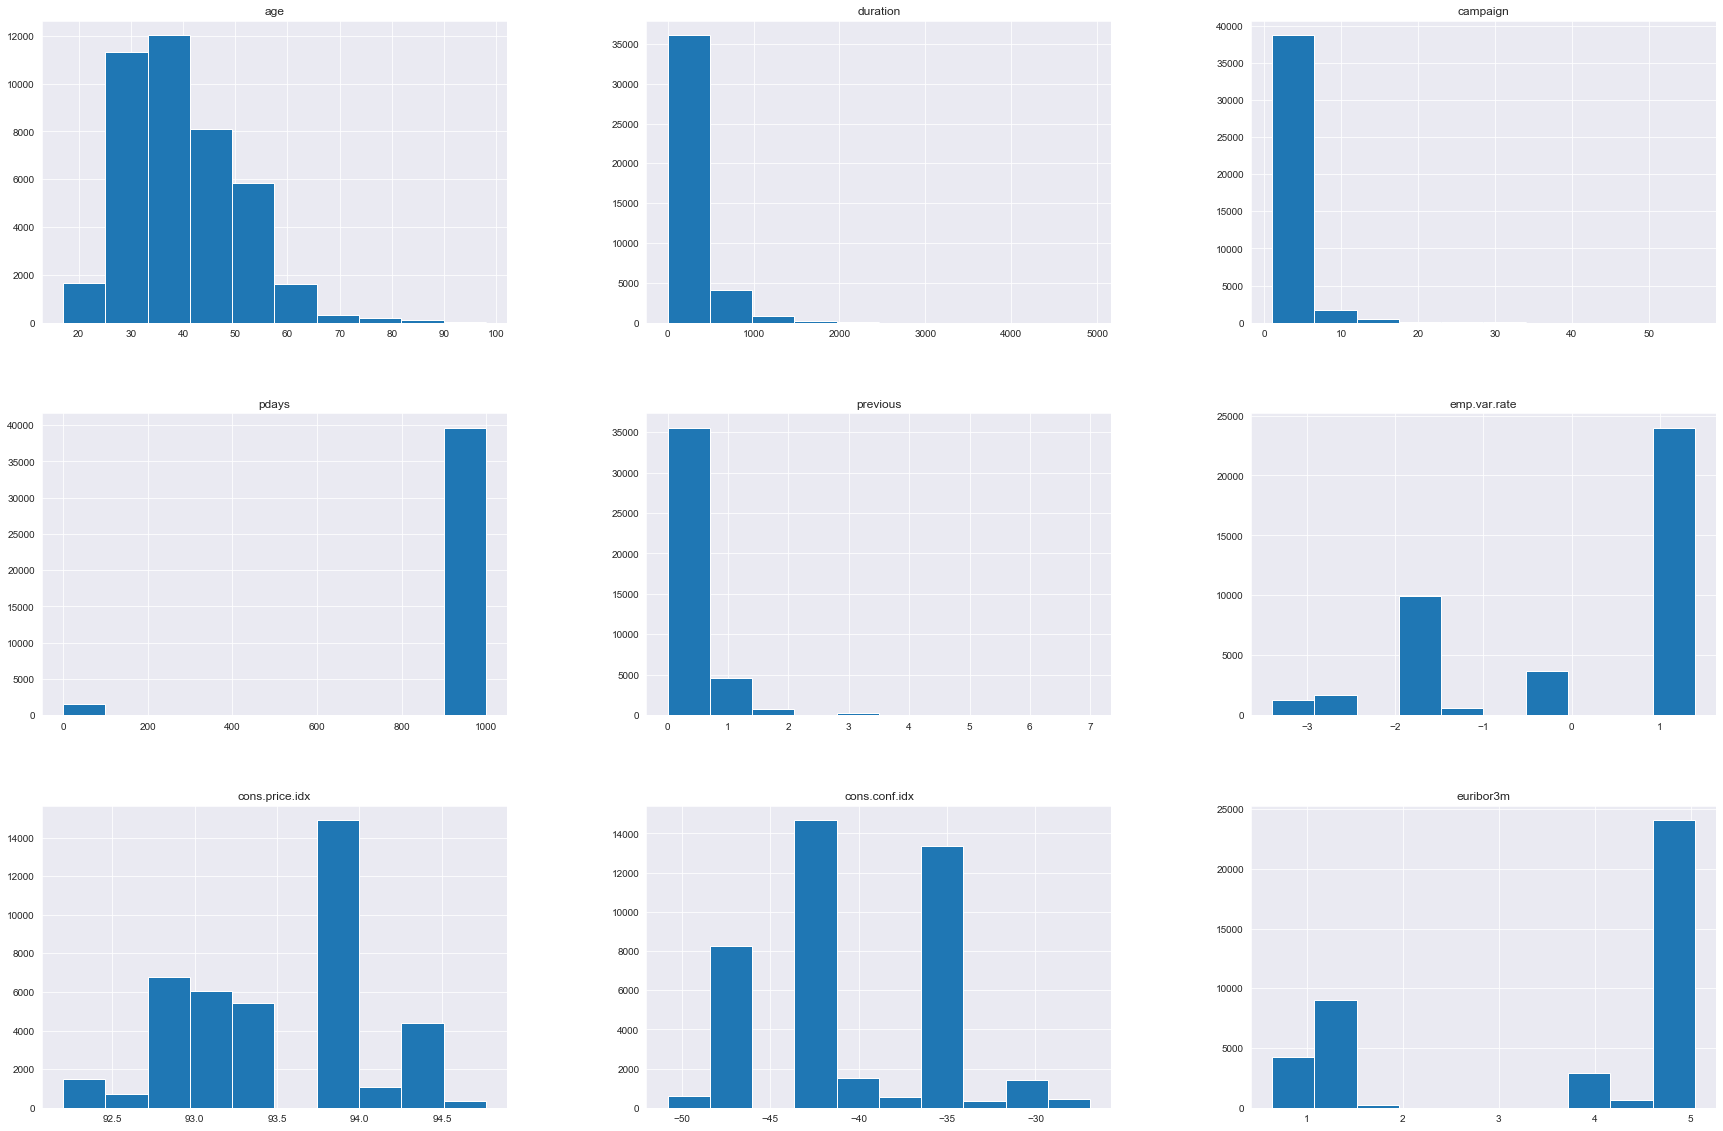

In [33]:
#setting the plot style using seaborn
sns.set_style('darkgrid')

#reviewing the 9 features for ease of review and plotting the histograms
features = df.iloc[:, 0:9]
features.hist(figsize=(30,20))

The data doesn't really look normally distributed, however, for most machine learning algorithms this isn't an issue.  We will be exploring the data further with a box-and-whisker plot before we start modelling.

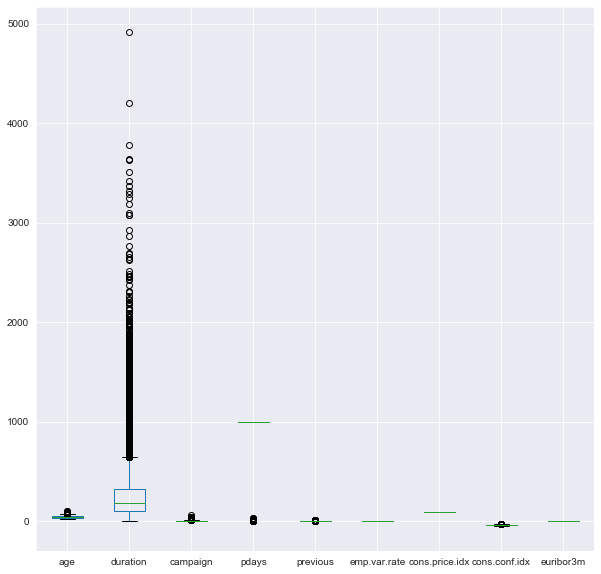

In [34]:
#making the box-and-whisker plot for the data
features.boxplot(figsize=(10,10))

Another useful visualization in this analysis is a heatmap.  This will give us an inclination of how many features we may need to retain in our model and what features interact closely together.  We can use seaborn to make this plot easily.

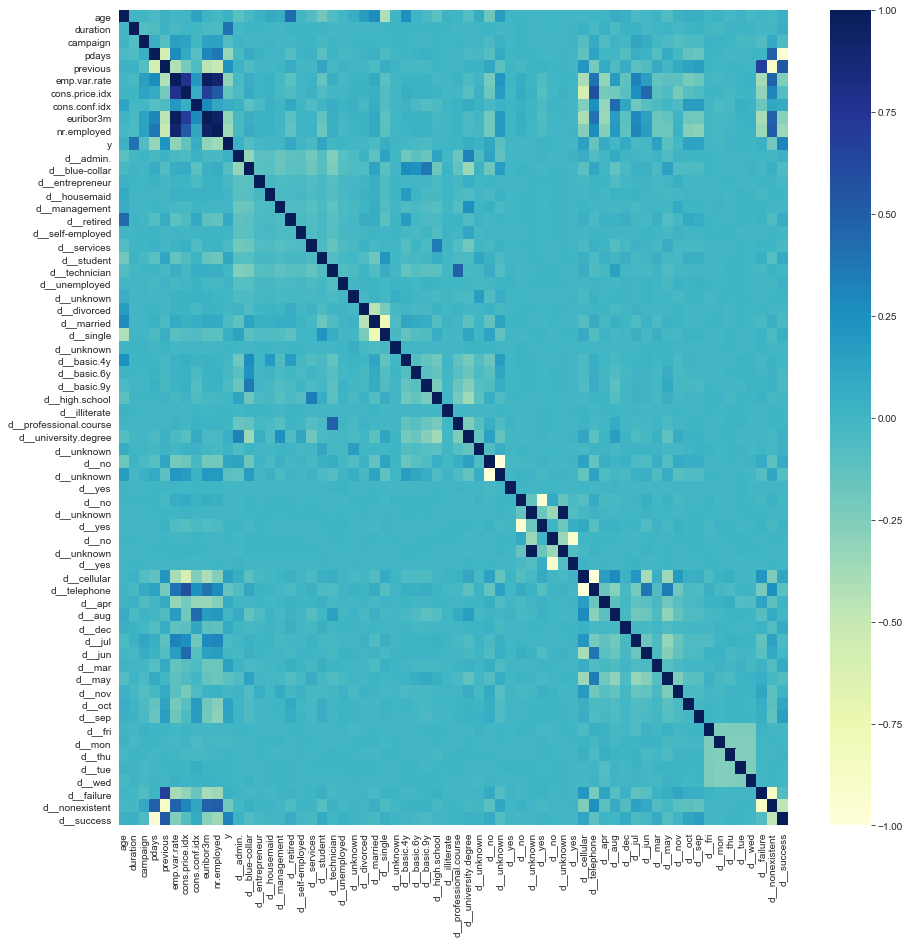

In [35]:
#plotting our heatmap to look at the correlations and including our target variable 

plt.figure(figsize=(15,15))
ax1 = sns.heatmap(df.corr(),cmap="YlGnBu")


In [36]:
#saving y as our target 
target = df.y

#dropping y from the new dataframe of features
df = df.drop(['y'], axis=1)

#checking to ensure everything loaded properly
print(target.shape, df.shape)
df.head()

(41188,) (41188, 63)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,d__oct,d__sep,d__fri,d__mon,d__thu,d__tue,d__wed,d__failure,d__nonexistent,d__success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


We should note here the column "duration" has an interesting relationship with the target variable.  If there were no phone calls (i.e. duration =0) then our target, y, __has to be no__.  In order to have a more realistic prediction, we will drop this column from our dataframe. 


In [37]:
#dropping duration from df

df=df.drop(["duration"], axis =1)

# Done with prep work

# lady Split

#Splitting the data into dependent and independent variables 
y = target
X = df

#80% training data with train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

#ensuring the dependent variables are stored as numeric datatypes
y_train = y_train.astype('int')
y_test = y_test.astype('int')

To facilitate the number of steps and the number of models, we will employ pipelines from ScikitLearn.  This will allow us to efficiently run not only the model, but the PCA and we can use a scalar to standardize the dataset to between 0 and 1. We can start with a baseline model and print the accuracy score.  We will use logistic regression as the baseline.

# Voots Split

In [38]:
y = target

#80% training data with train test split
X_train_top7, X_test_top7, y_train_top7, y_test_top7 = train_test_split(df_limit_top7, y, test_size=.2)

#ensuring the dependent variables are stored as numeric datatypes
y_train_top7 = y_train_top7.astype('int')
y_test_top7 = y_test_top7.astype('int')

# Model Buidling

#1  Get coefficients out of logistic regression
#2. Print them out in a bar graph
#3. ROC chart of prediction
#4. Repeat 1-3 with models down below

#5. Since scores are good, hyper paremeters do not need to be tuned
#6. Output Probabilities into the same dataset used to train
#7. Get feature importances and compare to coefficents (Google how to get from XGB)

In [40]:
#Base case logistic Regression
clf_lr=LogisticRegression()
clf_lr.fit(X_train_top7,y_train_top7)
clf_lr_acc = clf_lr.score(X_test_top7, y_test_top7)
print(clf_lr_acc)

#Support Vector Machine
clf_svc = svm.SVC(probability = True, random_state=42)
clf_svc.fit(X_train_top7,y_train_top7)
clf_svc_acc = clf_svc.score(X_test_top7, y_test_top7)
print(clf_svc_acc)

#Decision Tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train_top7,y_train_top7)
clf_tree_acc = clf_tree.score(X_test_top7, y_test_top7)
print(clf_tree_acc)

#Random Forest
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_top7,y_train_top7)
clf_rf_acc = clf_rf.score(X_test_top7, y_test_top7)
print(clf_rf_acc)

#XGBoost
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train_top7,y_train_top7)
clf_xgb_acc = clf_xgb.score(X_test_top7, y_test_top7)
print(clf_xgb_acc)

#AdaBoostClassifier
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train_top7,y_train_top7)
clf_adb_acc = clf_adb.score(X_test_top7, y_test_top7)
print(clf_adb_acc)


0.8997329448895363
0.8882010196649672
0.8945132313668366
0.9016751638747269
[14:05:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9106579266812334
0.9037387715464918


In total we will review 6 models.  The logistic regression is already complete; the other 5 models are a Support Vector Machine, a Decision Tree, a Random Forest Classifier, the XGBoost model, and the AdaBoost model.  After the classifiers are created we can loop through each of the model's scores, and identify the most accurate model, ie the model with a score closest to 1.0.  

In [42]:

#print(clf_lr_score)
#print(clf_svc_acc)
#print(clf_tree_acc)
#print(clf_rf_acc)
#print(clf_xgb_acc)
#print(clf_adb_acc)




# list of strings
lst = [clf_lr_acc, clf_xgb_acc, clf_svc_acc, clf_tree_acc, clf_rf_acc, clf_adb_acc]
  
# Calling DataFrame constructor on list
# with indices and columns specified
df_acc = pd.DataFrame(lst, index =['Logistic Regression',                                    
                                   'Support Vector Machine',
                                   'Decision Tree',
                                   'RandomForest',
                                   'XGBoost', 
                                   'AdaBoost' ],
                                              columns =['Accuracy'])

df_acc = df_acc.sort_values(by=['Accuracy'],ascending=False)
df_acc
  

,Accuracy
Support Vector Machine,0.910658
AdaBoost,0.903739
XGBoost,0.901675
Logistic Regression,0.899733
RandomForest,0.894513
Decision Tree,0.888201


In [62]:
print('live')



#Base case logistic Regression
clf_lr=LogisticRegression()
clf_lr.fit(X_train_top7,y_train_top7)
clf_lr_acc = clf_lr.score(X_test_top7, y_test_top7)

df2 = df


a = pd.Series(clf_lr.predict(X_test_top7), index=X_test_top7.index)
#print(clf_lr.predict_proba(X_test_top7))
print(a)


live
18987    0
152      0
6574     0
18772    0
5718     0
14130    0
41117    1
40501    0
10668    0
24126    0
13532    0
19818    0
12650    0
23284    0
22701    0
5864     0
23998    0
22386    0
7993     0
18932    0
13842    0
20938    0
25118    0
9677     0
2103     0
32509    0
24002    0
29814    0
14492    0
11139    0
13565    0
37248    0
2534     0
4569     0
34807    0
3083     0
2529     0
30393    0
18198    0
10366    0
34091    0
9439     0
4261     0
9232     0
149      0
23886    0
32613    0
26970    0
25084    0
15844    0
17221    0
7412     0
13651    0
9049     0
31320    0
287      0
1824     0
8693     0
11543    0
22086    0
37809    1
8254     0
25809    0
12836    0
29464    0
14532    0
4959     0
22033    0
17165    0
11562    0
25852    0
4544     0
37592    0
29274    0
37111    0
5150     0
12142    0
4033     0
6532     0
13495    0
29852    0
40141    1
27363    0
4091     0
24778    1
36964    0
18213    0
10011    0
19799    0
24085    0
35918

live


AttributeError: 'LogisticRegression' object has no attribute 'proba'

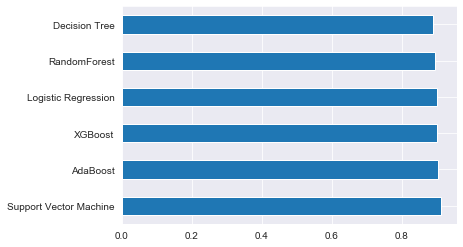

In [45]:
df_acc['Accuracy'].plot(kind = 'barh')


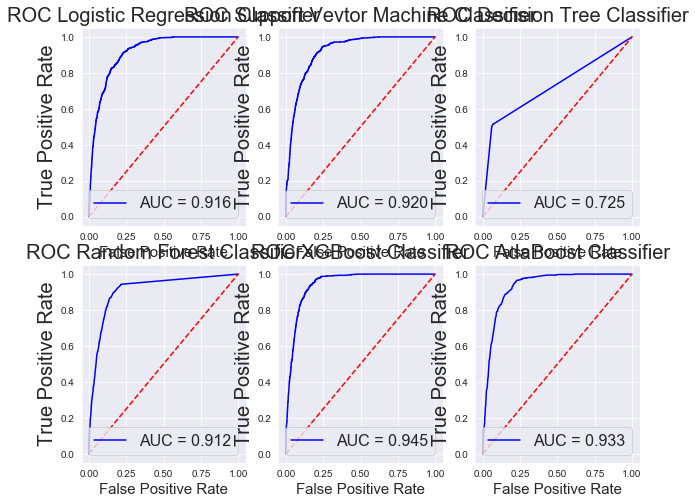

In [139]:
#setting our figures for subplots
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#logistic Regression
probs = clf_lr.predict_proba(X_test_top7)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = roc_curve(y_test_top7, preds)
roc_auclog = auc(fprlog, tprlog)
ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.3f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('ROC Logistic Regression Classifier',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#Support Vector Machine
probs = clf_svc.predict_proba(X_test_top7)
preds = probs[:,1]
fprsvm, tprsvm, thresholdsvm = roc_curve(y_test_top7, preds)
roc_aucsvm = auc(fprsvm, tprsvm)
ax_arr[0,1].plot(fprsvm, tprsvm, 'b', label = 'AUC = %0.3f' % roc_aucsvm)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('ROC Support Vevtor Machine Classifier',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#Decision tree model
probs = clf_tree.predict_proba(X_test_top7)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = roc_curve(y_test_top7, preds)
roc_aucdtree = auc(fprdtree, tprdtree)
ax_arr[0,2].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.3f' % roc_aucdtree)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('ROC Decision Tree Classifier',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#Random Forest Classifier
probs = clf_rf.predict_proba(X_test_top7)
preds = probs[:,1]
fprrf, tprrf, thresholdrf = roc_curve(y_test_top7, preds)
roc_aucrf =auc(fprrf, tprrf)
ax_arr[1,0].plot(fprrf, tprrf, 'b', label = 'AUC = %0.3f' % roc_aucrf)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('ROC Random Forest Classifier',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#XGBoost Classifier
probs = clf_xgb.predict_proba(X_test_top7)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = roc_curve(y_test_top7, preds)
roc_aucxgb =auc(fprxgb, tprxgb)
ax_arr[1,1].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.3f' % roc_aucxgb)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('ROC XGBoost Classifier',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#AadaBoost Classifier
probs = clf_adb.predict_proba(X_test_top7)
predsada = probs[:,1]
fpradb, tpradb, thresholdadb = roc_curve(y_test_top7, predsada)
roc_aucadb =auc(fpradb, tpradb)
ax_arr[1,2].plot(fpradb, tpradb, 'b', label = 'AUC = %0.3f' % roc_aucadb)
ax_arr[1,2].plot([0, 1], [0, 1],'r--')
ax_arr[1,2].set_title('ROC AdaBoost Classifier',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})



The measure of accuracy we are reviewing is calculated by the area under the ROC curve. An area of 1 represents a perfect score and an area of .5 represents a failed model.

Below is a guide for assessing the accuracy of our tests:  

> .90-1 = excellent 

> .80-.90 = good 

> .70-.80 = fair 

> .60-.70 = poor 

> <.60 = fail - effectively no better than random chance

In [20]:
#Lady's stuff BELOW

#creating a logistic regression model as a baseline
#we will set a random state for all of the model for reproducable results
pipe_lr = Pipeline([('pca', PCA(n_components=2)),
                 ('scaler',StandardScaler()),
                 ('clf', LogisticRegression(random_state=42))
])

#fitting the model on training data and printing the accuracy score on test data
pipe_lr.fit(X_train, y_train)
print(pipe_lr.score(X_test, y_test))

0.9041029376062151


In [21]:
#creating all of our pipelines and standardizing  the data with standard scaler
pipe_svm = Pipeline([('pca', PCA(n_components=2)),
                     ('scaler', StandardScaler()),
                     ('clf',svm.SVC(probability = True,random_state=42))
                      ])

pipe_tree = Pipeline([('pca', PCA(n_components=2)),
                      ('scaler', StandardScaler()),
                      ('clf',tree.DecisionTreeClassifier(random_state=42))
                       ])


pipe_rf = Pipeline([('pca', PCA(n_components=2)),
                    ('scaler', StandardScaler()),
                    ('clf',RandomForestClassifier(random_state=42))
                     ])

pipe_xgb= Pipeline([('pca', PCA(n_components=2)),
                    ('scaler', StandardScaler()),
                    ('clf',XGBClassifier(random_state=42))
                    ])

pipe_adb = Pipeline([('pca', PCA(n_components=2)),
                     ('scaler', StandardScaler()),
                     ('clf', AdaBoostClassifier(random_state = 42))
                      ])

# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_svm, pipe_tree, pipe_rf, pipe_xgb, pipe_adb]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0:'Logistic Regression' ,1: 'SVM', 2: 'Decision Tree', 3: 'Random Forest', 4:'XGBoost', 5:'AdaBoost'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.4f' % (pipe_dict[idx], val.score(X_test, y_test)))

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])


[17:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Logistic Regression pipeline test accuracy: 0.9041
SVM pipeline test accuracy: 0.9023
Decision Tree pipeline test accuracy: 0.8447
Random Forest pipeline test accuracy: 0.8859
XGBoost pipeline test accuracy: 0.9013
AdaBoost pipeline test accuracy: 0.9008
Classifier with best accuracy: Logistic Regression


Now that we have numerical assessment of the models, all of which did a good job classifying the customers according to the accuracy score, we can review the elbow plots individually to clarify the understanding of model performance.

These visualizations paint a different accuracy picture than the simple score provided above.  The final piece of this section of the analysis will review all of these plots on the same set of axes. A review of these findings will follow.

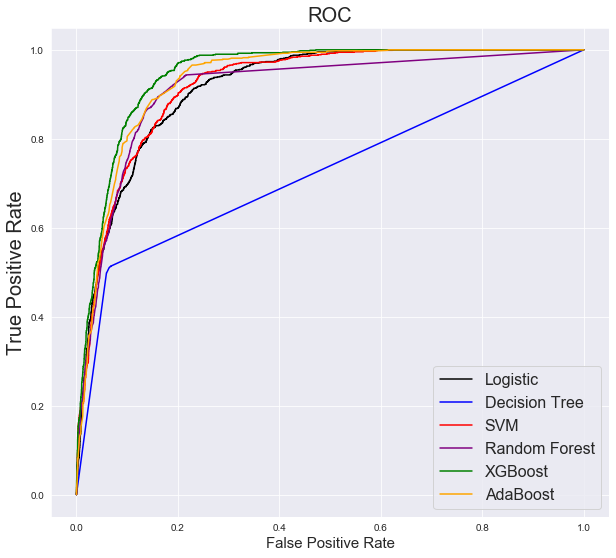

In [141]:
#plotting the ROC on the same axis
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,9))

ax.plot(fprlog, tprlog, 'b', label = 'Logistic', color='black')
ax.plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax.plot(fprsvm, tprsvm, 'b', label = 'SVM', color='red')
ax.plot(fprrf, tprrf, 'b', label = 'Random Forest', color='purple') #visible under the XGBoost line
ax.plot(fprxgb, tprxgb, 'b', label = 'XGBoost', color='green')
ax.plot(fpradb, tpradb, 'b', label = 'AdaBoost', color='orange')

ax.set_title('ROC',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

We will manually calculate some additional metrics to arrive at a clearer understanding of the make-up of the matrices. Calculating these metrics manually, trade-offs between minimizing False negatives and minimizing False positives becomes much clearer. Scikit.Learn contains methods to compute these values as well.


The three metrics we will compute are as follows:

> __Precision__ - True Positive/(True Negative + False Positive) - Measures the ability of the classifier to label a positive sample as a positive sample, not a negative one.

> __Recall__- True Positive / (True Positive + False Negative) - Measures the ability of the classifier to correctly identify all the positive samples.  Represents an inverse relationship to Precision, ie increasing your recall score reduces your precision score and vice versa. 

> __F1-Score__ - 2 * (Precision * Recall)/(Precision + Recall) - Represents the harmonic mean of precision and recall.  Essentially gives the mid-point between increasing balancing recall and precision. 

In addition, we will print the confusion matrix for each model so we can review these metrics in action.

For reference and ease of recollection, a sample confusion matrix is below: 
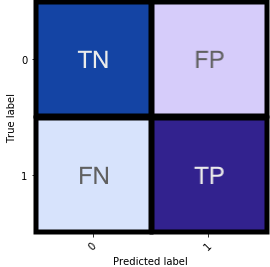

In [24]:
for x, pipe in zip(pipe_dict, pipelines):
    #iterating through each model
    print('\n\nConfusion Matrix for {}:'.format(pipe_dict[x]))
    #creating a confusion matrix
    conf_m = confusion_matrix(y_test, pipe.predict(X_test))
    print(conf_m)
    #separating the matrtix into positive and negative and true and false
    true_n = conf_m[0][0]
    false_p = conf_m[0][1]
    false_n = conf_m[1][0]
    true_p = conf_m[1][1]
    #manually calculating the assessment metrics
    precision = true_p/(true_p+false_p)
    recall = true_p/(true_p+false_n)
    f_1= 2*(precision * recall)/(precision + recall)
    #printing our results
    print("Precision :{}%".format(round(precision*100,4)))
    print("Recall: {}%".format(round(recall*100,4)))
    print("F-1: {}%".format(round(f_1*100,4)))    
    print ('cat')



Confusion Matrix for Logistic Regression:
[[7268   67]
 [ 723  180]]
Precision :72.8745%
Recall: 19.9336%
F-1: 31.3043%
cat


Confusion Matrix for SVM:
[[7282   53]
 [ 752  151]]
Precision :74.0196%
Recall: 16.722%
F-1: 27.2809%
cat


Confusion Matrix for Decision Tree:
[[6676  659]
 [ 620  283]]
Precision :30.0425%
Recall: 31.34%
F-1: 30.6775%
cat


Confusion Matrix for Random Forest:
[[7039  296]
 [ 644  259]]
Precision :46.6667%
Recall: 28.6822%
F-1: 35.5281%
cat


Confusion Matrix for XGBoost:
[[7211  124]
 [ 689  214]]
Precision :63.3136%
Recall: 23.6988%
F-1: 34.4883%
cat


Confusion Matrix for AdaBoost:
[[7262   73]
 [ 744  159]]
Precision :68.5345%
Recall: 17.608%
F-1: 28.0176%
cat


So what does this mean to us in business terms?  First, we need to define what a false positive and false negative are. 

A __false positive__ reflects a customer that did not subscribe to the loan program but our model thought it did.   __False negatives__ are a customer that did in fact sign up for the loan program but the model incorrectly classified them as non-subscribers.  

Which business case do we want to minimize? Generally it depends, neither of course are good, but in this case I think we should look for a model that had a lower number of false positives. We're really focusing on the success of the marketing campaign, so if we accidentally bother a customer a second time for a loan, we are an annoyance, but if we attribute false success to the campaign we can end up misallocating company resources.

For example, perhaps an email campaign would have been a better choice if we have a heavily 'no' skewed response.  The business manager would want to understand dollars spent and revenue created.  We wouldn't want to falsely attribute a success here.    

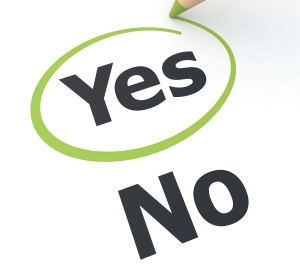

## Overview and Business Insights

Given what we have outlined in this notebook, what model would we recommend to the bank managers? As I suggested above, minimizing the false positives and therefore should focus on Precision and overall accuracy for the model choice. So, in this case the recommendation would be to use the XGBoost Classifier algorithm. This model performed with high or the highest scores in each of the metric categories we reviewed.

We have created a model for the managers that 73% of the time can correctly identify if a customer has signed up for a term loan product over the phone without taking into account the effect of the duration of the final touch point. 

Should the bank undergo an additional marketing campaign with a new customer base, the investment analysis would have a reasonably strong case for their predicted revenues.   The model can give a sense of who would actually sign up.  Using the XGBoost model has a number of benefits. It was designed as a scalable a gradient boosting algorithm and was developed with the goal of high model performance and computational speeds.

## Future analysis

If we had additonal time and notebook space to continue forward, we would complete a full analysis on the dataset that includes duration.  We would also address duration for only subscribed customers in a regression analysis to see if we can predict sign-up based on call time.  Finally, we could remove our principal component analysis from the pipeline models to see how computational efficiency weighs against accuracy.


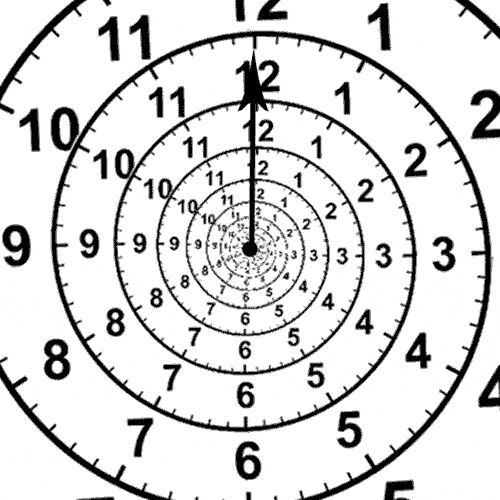

## Process Summary

1. Using an additional notebook to document process as I move along.

2. Data description and explanation

3. Import libraries

4. Load thee data into Pandas Dataframe

5. Review of attribute descriptions provided with the original dataset

6. Look at summary statistics

7. Convert target to binary [0,1]

8. Save target as separate variable and make a new dataframe for our features with the y series dropped

9. Get dummy variables for categorical features

10. Visualizing the selected features using histograms and box-and-whisker plots

11. Recreating the heatmap with the chosen level of features

12. Splitting data into train test splits

13. Setting a baseline Logistic regression model using pipelines

14. Running separate pipelines for 5 additional models [SVM, Decision tree, Random Forest, XGBoost, AdaBoost]

15. Creating ROCs to review model performance for each model individually

16. Plotting each models' ROC on the same axis

17. Computing additional metrics, precion, recall, and F-1 scores to assess the model appropriateness

18. Business Insights 

19. Possible future analysis

20. Summary of methods
